<a href="https://colab.research.google.com/github/MasterProcastinator97/WeatherWizard-Haykal-Zikri/blob/main/THE_ASSIGNMENT_FINALE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Configuration (Weather)

In [ ]:
!pip install pyinputplus
import pyinputplus as pyip

In [ ]:
# Setting up the OpenWeathermap API key using Colab Secrets
from google.colab import userdata
import os

# Access the API key from Colab Secrets
api_key = userdata.get('OPENWEATHER_API_KEY')

# Setting environment variable for compatibility with the existing function
if api_key:
    os.environ['OPENWEATHER_API_KEY'] = api_key
else:
    print("OpenWeatherMap API Key not found in Colab Secrets. Please add it using the 🔑 icon.")

In [ ]:
import os
import requests
from datetime import datetime
import pandas as pd

# Checking if the environment variable is set and print its value
api_key_status = os.environ.get('OPENWEATHER_API_KEY')

if api_key_status:
    print(f"OpenWeatherMap API Key is set.")

else:
    print("OpenWeatherMap API Key is NOT set.")

OpenWeatherMap API Key is set.


# Weather Data Component

In [ ]:
def get_weather_data(location, forecast_days=5):
    """
    Retrieve weather data from the OpenWeatherMap API and return it as a pandas DataFrame.
    """
    api_key = os.environ.get("OPENWEATHER_API_KEY")
    if not api_key:
        print("Error: OPENWEATHER_API_KEY not found. Please set it in your environment.")
        return None

    base_url = "https://api.openweathermap.org/data/2.5/forecast"
    params = {'q': location, 'appid': api_key, 'units': 'metric'}

    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()
        raw_data = response.json()

        processed_forecast = []
        unique_dates = set()

        for item in raw_data['list']:
            date_str = item['dt_txt'].split(' ')[0]
            if date_str not in unique_dates and len(processed_forecast) < forecast_days:
                unique_dates.add(date_str)
                processed_forecast.append({
                    "Date": date_str,
                    "Description": item['weather'][0]['description'].title(),
                    "Max Temp (°C)": int(item['main']['temp_max']),
                    "Min Temp (°C)": int(item['main']['temp_min']),
                    "Humidity (%)": item['main']['humidity'],
                    "Rain Chance (%)": int(item['pop'] * 100)
                })

        weather_df = pd.DataFrame(processed_forecast)
        return weather_df

    except requests.exceptions.HTTPError as http_err:
        if response.status_code == 404:
            print(f"Sorry, I couldn't find any weather data for '{location}'. Please check the spelling and try again (e.g., 'City, CountryCode').")
        else:
            print(f"HTTP error occurred: {http_err}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

# Testing the answers for Weather Analysis


In [ ]:
# Testing with a valid location in table
perth_weather = get_weather_data("Perth,AU")
display(perth_weather)

,Date,Description,Max Temp (°C),Min Temp (°C),Humidity (%),Rain Chance (%)
0,2025-10-19,Light Rain,21,20,55,100
1,2025-10-20,Light Rain,14,14,70,65
2,2025-10-21,Few Clouds,13,13,74,5
3,2025-10-22,Clear Sky,14,14,66,0
4,2025-10-23,Overcast Clouds,14,14,68,0


In [ ]:
# Testing with a valid location with the "print" function
sydney_weather = get_weather_data("Sydney,AU")
print(sydney_weather)

         Date      Description  Max Temp (°C)  Min Temp (°C)  Humidity (%)  \
0  2025-10-19       Few Clouds             24             24            61   
1  2025-10-20       Few Clouds             30             30            31   
2  2025-10-21  Overcast Clouds             20             20            64   
3  2025-10-22  Overcast Clouds             31             31            38   
4  2025-10-23    Broken Clouds             22             22            39   

   Rain Chance (%)  
0                0  
1                0  
2                0  
3                0  
4                0  


In [ ]:
# Testing with a Valid country, with no particular location
indonesia_weather = get_weather_data("Indonesia")
print(indonesia_weather)


         Date       Description  Max Temp (°C)  Min Temp (°C)  Humidity (%)  \
0  2025-10-19        Light Rain             30             28            58   
1  2025-10-20   Overcast Clouds             25             25            73   
2  2025-10-21  Scattered Clouds             27             27            64   
3  2025-10-22        Light Rain             26             26            66   
4  2025-10-23   Overcast Clouds             24             24            76   

   Rain Chance (%)  
0              100  
1               80  
2                7  
3               20  
4                0  


In [ ]:
# Testing with a Valid country, with no particular location
indonesia_weather = get_weather_data("Indonesia")
display(indonesia_weather)


,Date,Description,Max Temp (°C),Min Temp (°C),Humidity (%),Rain Chance (%)
0,2025-10-19,Light Rain,30,28,58,100
1,2025-10-20,Overcast Clouds,25,25,73,80
2,2025-10-21,Scattered Clouds,27,27,64,7
3,2025-10-22,Light Rain,26,26,66,20
4,2025-10-23,Overcast Clouds,24,24,76,0


In [ ]:
# Testing with Invalid Question
mustafar_weather = get_weather_data("mustafar")
print(mustafar_weather)

Sorry, I couldn't find any weather data for 'mustafar'. Please check the spelling and try again (e.g., 'City, CountryCode').
None


# Setup and Configuration (Visualisation)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta


# Visualisation Components

_______________________________________________________

## *Temperature*

In [ ]:
# Define create_temperature_visualisation
def create_temperature_visualisation(weather_df, location, output_type='display'):
    """
    Creates a line chart of max and min temperatures from a weather DataFrame.
    Handles missing and extreme values.
    """
    if weather_df is None or weather_df.empty:
        print("Cannot create visualization: Weather data is not available.")
        return

    # Data Cleaning and Validation for Temperature
    temp_df = weather_df.copy()
    numeric_cols = ['Max Temp (°C)', 'Min Temp (°C)']
    for col in numeric_cols:
        # Convert to numeric, coercing errors to NaN
        temp_df[col] = pd.to_numeric(temp_df[col], errors='coerce')
        # Check for extreme values
        if temp_df[col].max() > 60 or temp_df[col].min() < -50:
            print(f"Warning: Extreme values detected in {col} for {location}.")

    # Drop rows with NaN in temperature columns before plotting
    temp_df = temp_df.dropna(subset=numeric_cols)

    if temp_df.empty:
        print(f"Cannot create visualization: No valid temperature data for {location}.")
        return


    plt.style.use('seaborn-v0_8')
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plotting Max and Min temperatures
    ax.plot(temp_df['Date'], temp_df['Max Temp (°C)'], marker='o', linestyle='-', label='Max Temp (°C)')
    ax.plot(temp_df['Date'], temp_df['Min Temp (°C)'], marker='o', linestyle='-', label='Min Temp (°C)')

    # Adding labels and title for clarity
    ax.set_title(f"{location} 5-Day Temperature Forecast", fontsize=16)
    ax.set_ylabel("Temperature (°C)", fontsize=12)
    ax.set_xlabel("Date", fontsize=12)
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

    if output_type == 'figure':
        return fig
    else:
        plt.show()

# Testing the Answers for Temperature

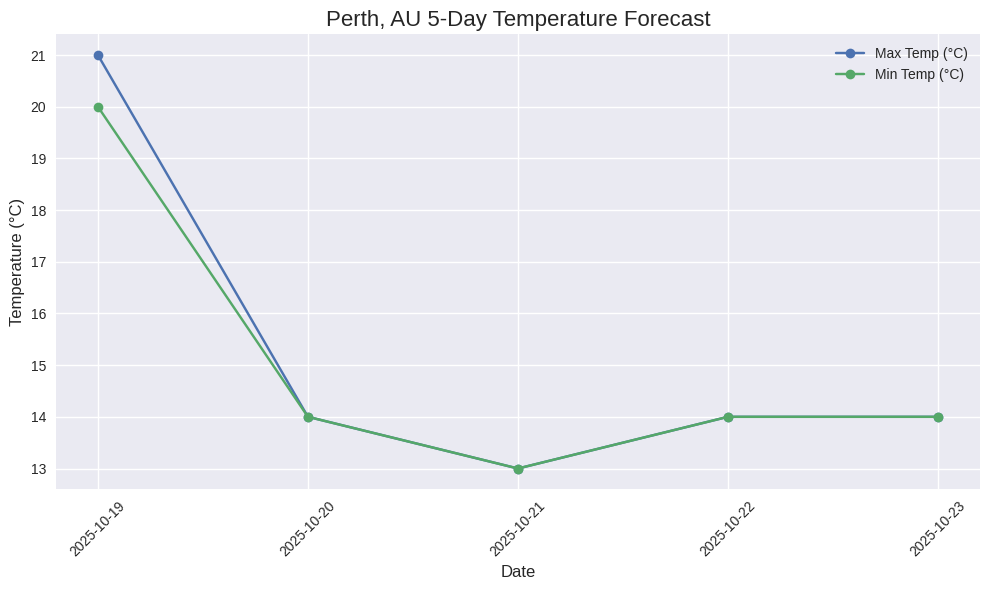

In [ ]:
perth_weather = get_weather_data("Perth, AU")
create_temperature_visualisation(perth_weather,"Perth, AU")

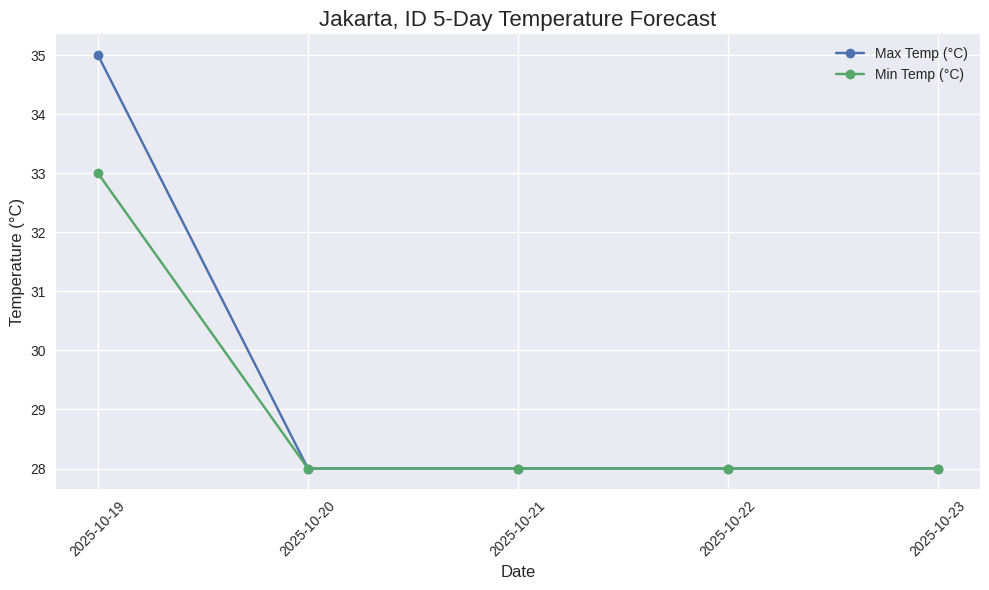

In [ ]:
jakarta_weather = get_weather_data("Jakarta, ID")
create_temperature_visualisation(jakarta_weather, "Jakarta, ID")

In [ ]:
# Testing for invalid question
tattoine_weather = get_weather_data("tattoine")
create_temperature_visualisation(tattoine_weather,"tattoine")

Invalid location for 'tattoine'. Please try again.
Cannot create visualization: Weather data is not available.


## *Precipitation*

In [92]:
# Define create_precipitation_visualisation
def create_precipitation_visualisation(weather_df, location, output_type='display'):
    """
    Creates a grouped bar chart of precipitation chance and humidity from a weather DataFrame.
    """
    if weather_df is None or weather_df.empty:
        print("Cannot create visualization: Weather data is not available.")
        return

    # Data Cleaning and Validation
    df = weather_df.copy()
    numeric_cols = ['Rain Chance (%)', 'Humidity (%)']
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df = df.dropna(subset=numeric_cols)

    if df.empty:
        print(f"Cannot create visualization: No valid data for {location}.")
        return

    # Grouped Bar Chart Logic
    plt.style.use('seaborn-v0_8')
    fig, ax = plt.subplots(figsize=(12, 7))

    dates = df['Date']
    x = np.arange(len(dates))  # the label locations
    width = 0.35  # the width of the bars

    # Plotting the two sets of bars
    rects1 = ax.bar(x - width/2, df['Rain Chance (%)'], width, label='Chance of Rain (%)', color='skyblue')
    rects2 = ax.bar(x + width/2, df['Humidity (%)'], width, label='Humidity (%)', color='orange')

    # Adding labels, title, and legend
    ax.set_ylabel('Percentage (%)', fontsize=12)
    ax.set_title(f"{location.split(',')[0].title()} 5-Day Precipitation & Humidity Forecast", fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(dates, rotation=45, ha="right")
    ax.legend()

    # Add labels on top of the bars for clarity
    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    ax.set_ylim(0, 110)
    plt.tight_layout()

    if output_type == 'figure':
        return fig
    else:
        plt.show()

# Testing the Answers for Precipitation

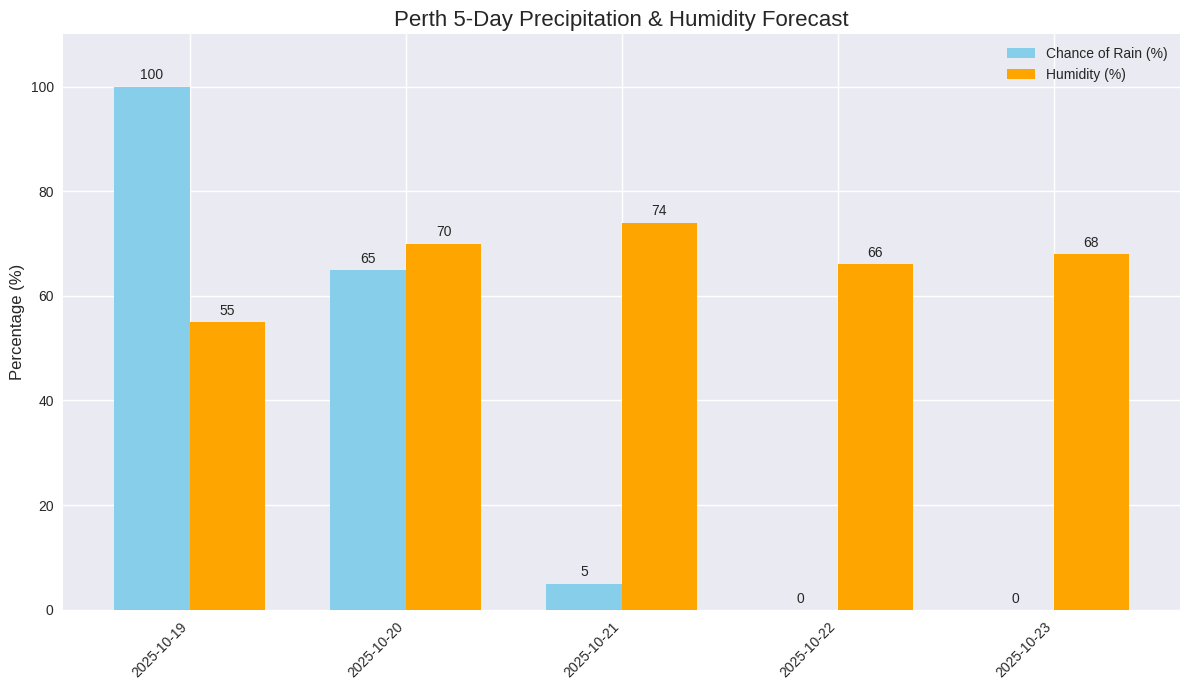

In [ ]:
perth_weather = get_weather_data("Perth, AU")
create_precipitation_visualisation(perth_weather,"Perth, AU")

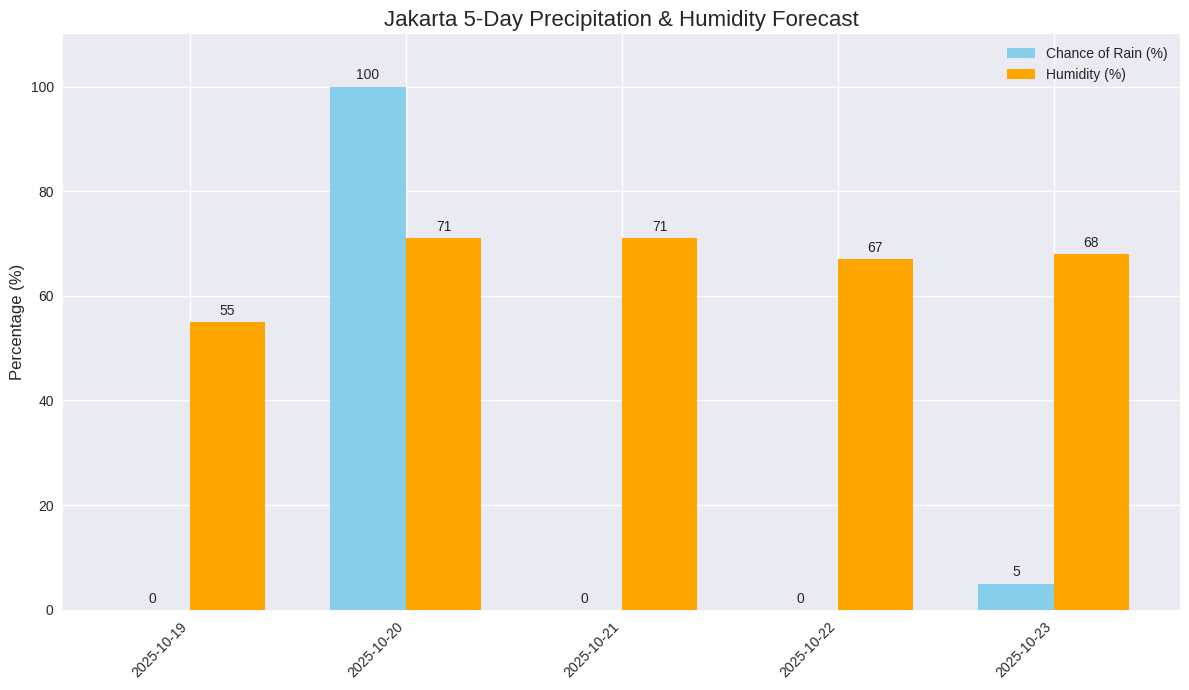

In [ ]:
jakarta_weather = get_weather_data("Jakarta, ID")
create_precipitation_visualisation(jakarta_weather, "Jakarta, ID")

In [ ]:
# Testing for Invalid answers
mustafar_weather = get_weather_data("mustafar")
create_precipitation_visualisation(mustafar_weather, "mustafar")

Invalid location for 'mustafar'. Please try again.
Cannot create visualization: Weather data is not available.


# Edge Cases: Extreme and Missing Values

In [ ]:
# Test data with missing values
missing_data = {
    "Date": ["2025-10-22", "2025-10-23", "2025-10-24", "2025-10-25", "2025-10-26"],
    "Description": ["Sunny", "Cloudy", "Rainy", "Partly Cloudy", "Windy"],
    "Max Temp (°C)": [25, np.nan, 28, 22, 20],
    "Min Temp (°C)": [15, 18, 20, np.nan, 14],
    "Humidity (%)": [60, 65, 70, 75, np.nan],
    "Rain Chance (%)": [10, 20, np.nan, 40, 50]
}
missing_weather_df = pd.DataFrame(missing_data)
print("--- Test Data with Missing Values ---")
display(missing_weather_df)

# Test data with extreme values
extreme_data = {
    "Date": ["2025-10-27", "2025-10-28", "2025-10-29", "2025-10-30", "2025-10-31"],
    "Description": ["Hot", "Cold", "Very Wet", "Dry", "Normal"],
    "Max Temp (°C)": [70, -60, 30, 25, 22],
    "Min Temp (°C)": [40, -70, 25, 20, 15],
    "Humidity (%)": [120, -10, 80, 10, 60],
    "Rain Chance (%)": [-20, 150, 70, 0, 30]
}
extreme_weather_df = pd.DataFrame(extreme_data)
print("\n--- Test Data with Extreme Values ---")
display(extreme_weather_df)

# Test data with a mix of missing and extreme values
mixed_data = {
    "Date": ["2025-11-01", "2025-11-02", "2025-11-03", "2025-11-04", "2025-11-05"],
    "Description": ["Mix", "Weird", "Problem", "Okay", "Fine"],
    "Max Temp (°C)": [30, np.nan, 80, 25, -10],
    "Min Temp (°C)": [20, -80, np.nan, 20, 5],
    "Humidity (%)": [70, 110, 50, np.nan, 60],
    "Rain Chance (%)": [np.nan, 30, -30, 50, 80]
}
mixed_weather_df = pd.DataFrame(mixed_data)
print("\n--- Test Data with Mixed Values ---")
display(mixed_weather_df)

--- Test Data with Missing Values ---


,Date,Description,Max Temp (°C),Min Temp (°C),Humidity (%),Rain Chance (%)
0,2025-10-22,Sunny,25.0,15.0,60.0,10.0
1,2025-10-23,Cloudy,NaN,18.0,65.0,20.0
2,2025-10-24,Rainy,28.0,20.0,70.0,NaN
3,2025-10-25,Partly Cloudy,22.0,NaN,75.0,40.0
4,2025-10-26,Windy,20.0,14.0,NaN,50.0



--- Test Data with Extreme Values ---


,Date,Description,Max Temp (°C),Min Temp (°C),Humidity (%),Rain Chance (%)
0,2025-10-27,Hot,70,40,120,-20
1,2025-10-28,Cold,-60,-70,-10,150
2,2025-10-29,Very Wet,30,25,80,70
3,2025-10-30,Dry,25,20,10,0
4,2025-10-31,Normal,22,15,60,30



--- Test Data with Mixed Values ---


,Date,Description,Max Temp (°C),Min Temp (°C),Humidity (%),Rain Chance (%)
0,2025-11-01,Mix,30.0,20.0,70.0,NaN
1,2025-11-02,Weird,NaN,-80.0,110.0,30.0
2,2025-11-03,Problem,80.0,NaN,50.0,-30.0
3,2025-11-04,Okay,25.0,20.0,NaN,50.0
4,2025-11-05,Fine,-10.0,5.0,60.0,80.0


## Test visualizations with edge cases


--- Testing Temperature Visualization with Test Data ---


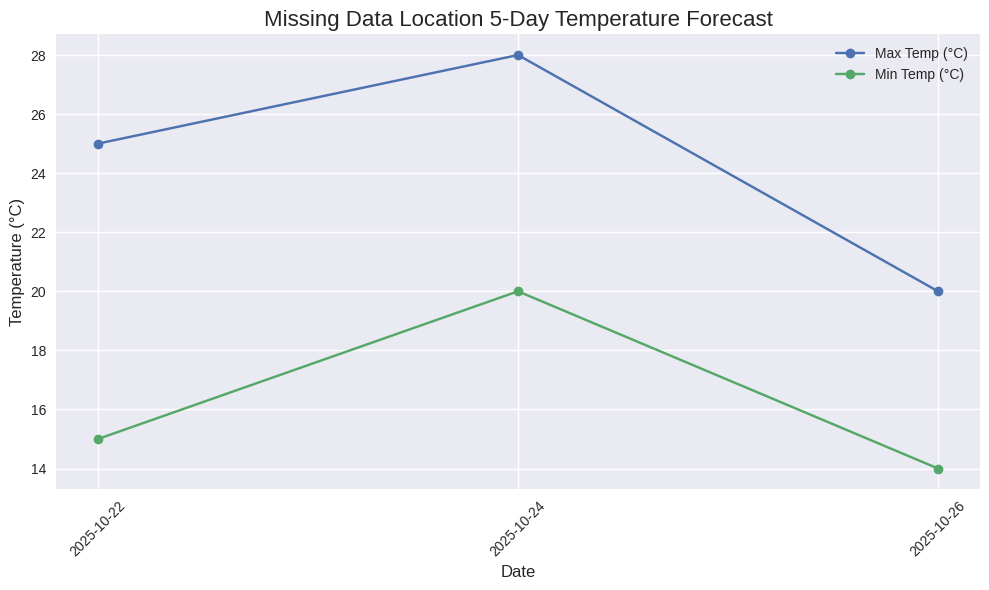

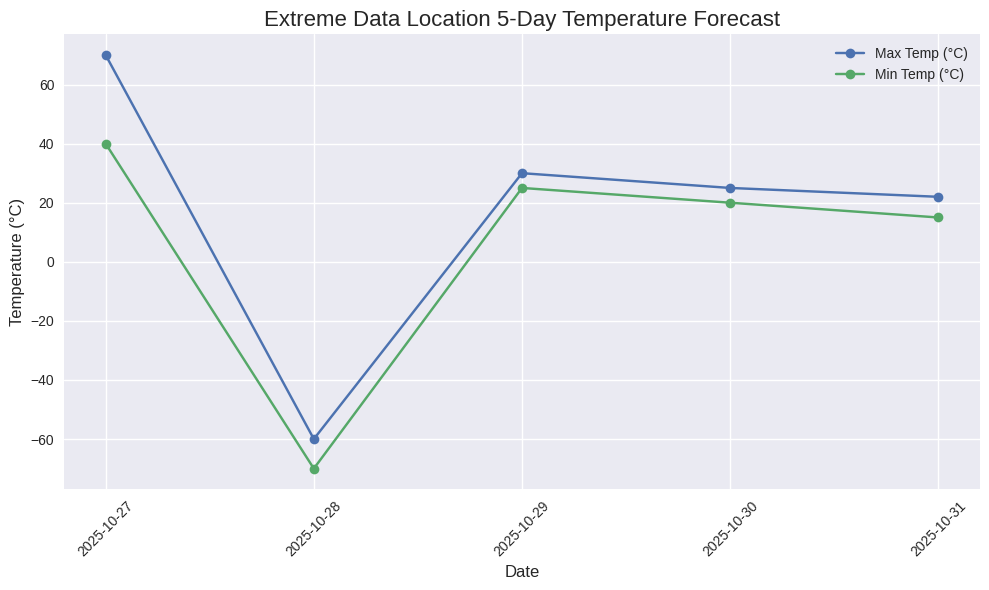

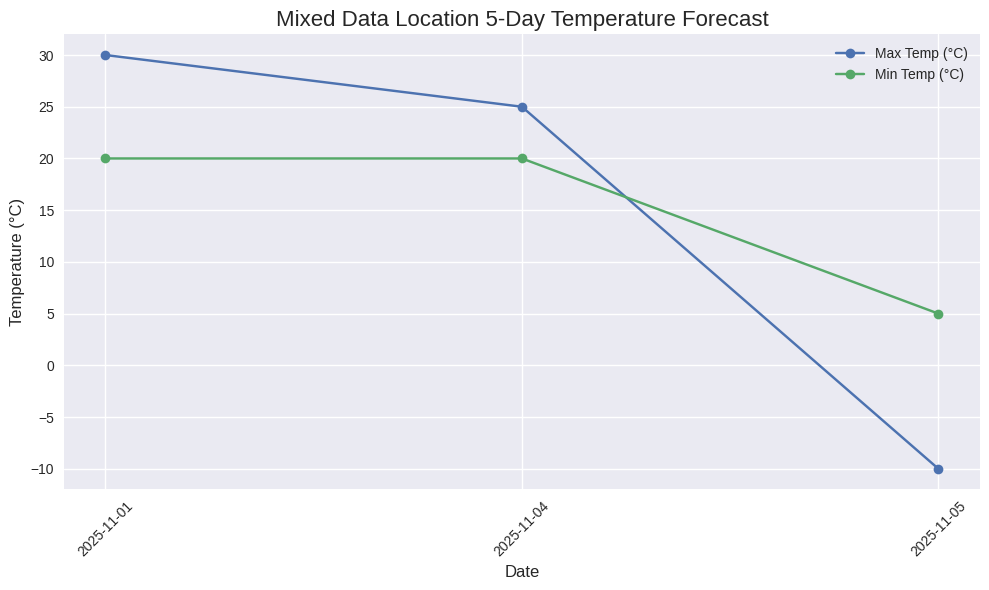


--- Testing Precipitation Visualization with Test Data ---


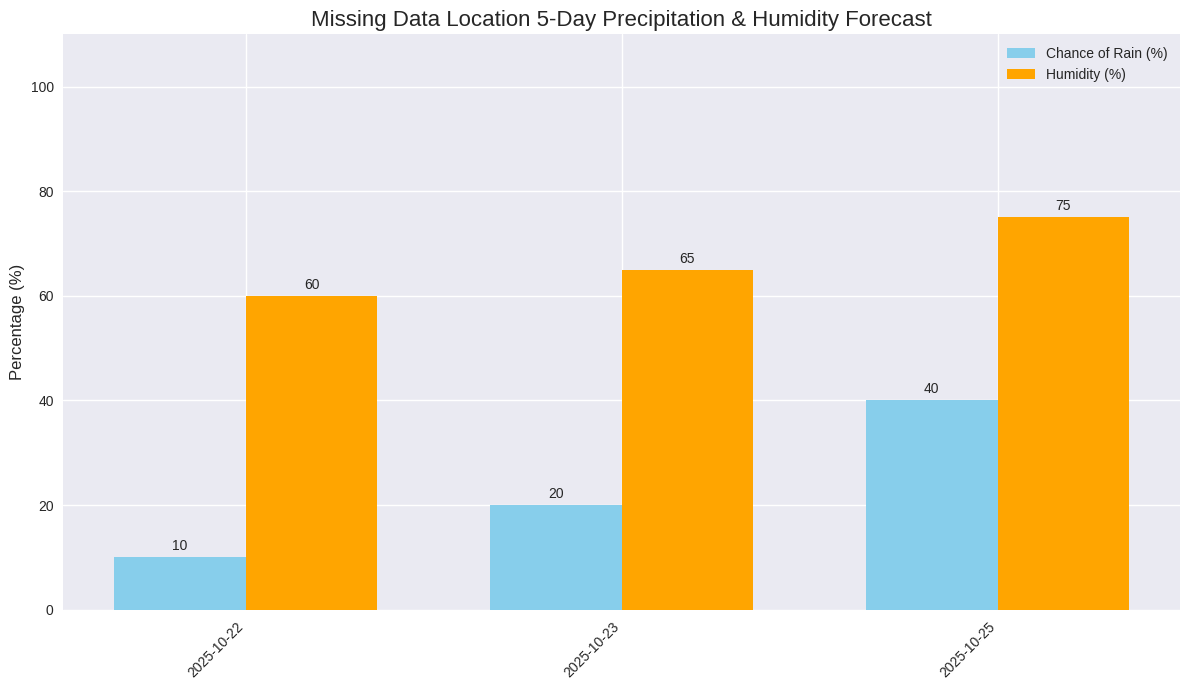

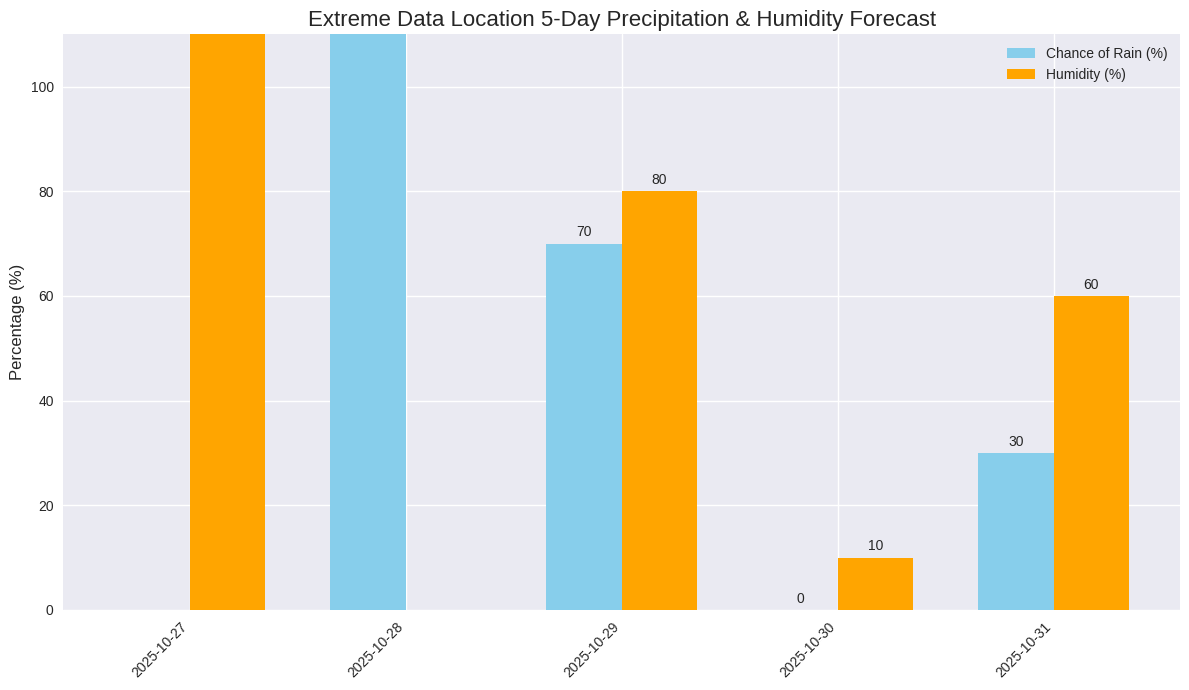

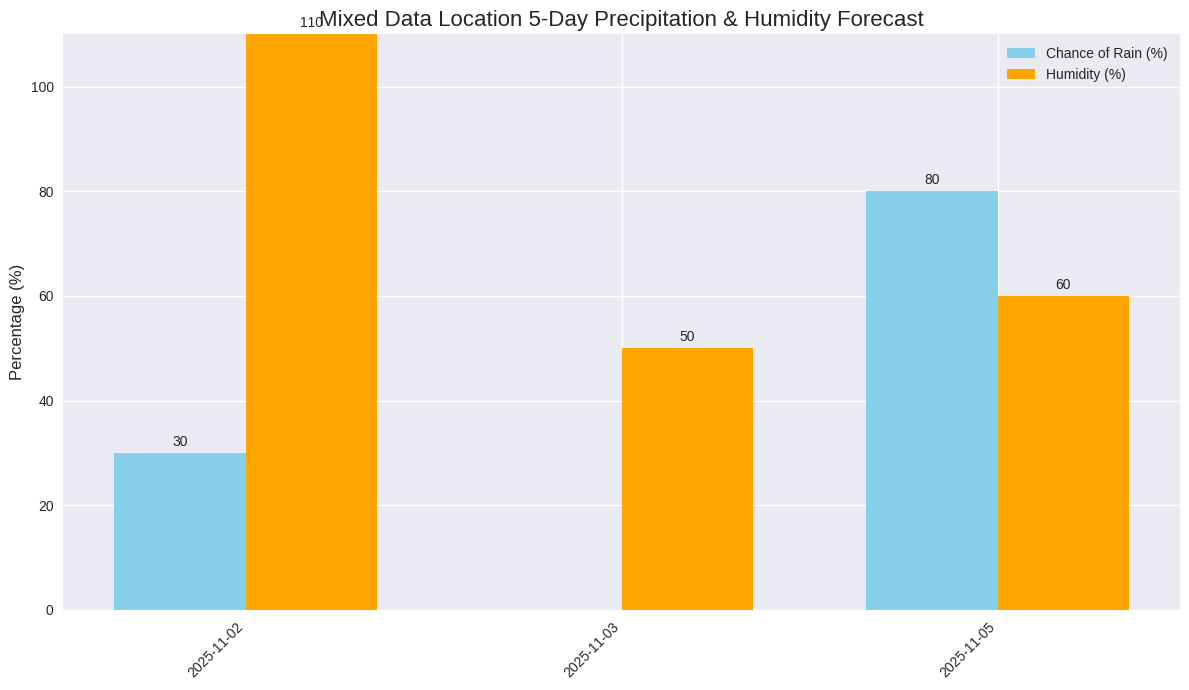

In [ ]:
print("\n--- Testing Temperature Visualization with Test Data ---")
create_temperature_visualisation(missing_weather_df, "Missing Data Location")
create_temperature_visualisation(extreme_weather_df, "Extreme Data Location")
create_temperature_visualisation(mixed_weather_df, "Mixed Data Location")

print("\n--- Testing Precipitation Visualization with Test Data ---")
create_precipitation_visualisation(missing_weather_df, "Missing Data Location")
create_precipitation_visualisation(extreme_weather_df, "Extreme Data Location")
create_precipitation_visualisation(mixed_weather_df, "Mixed Data Location")

# Natural Language Interface Component

In [97]:
import time

_______________________________________________________

## *Parse Weather Question*

In [ ]:
# Natural Language Processing Functions

def parse_weather_question(question):
    """
    Parses a natural language question to extract location, time, and attribute.
    This version is improved to correctly separate advice keywords from the location.
    """
    # Keyword Definitions
    time_keywords = {
        "today": 0, "tomorrow": 1, "in 2 days": 2, "in 3 days": 3, "in 4 days": 4
    }

    attribute_keywords = {
        "temp": "Max Temp (°C)", "temperature": "Max Temp (°C)",
        "high": "Max Temp (°C)", "low": "Min Temp (°C)",
        "rain": "Rain Chance (%)", "raining": "Rain Chance (%)",
        "humidity": "Humidity (%)",
        "weather": "Description", "outlook": "Description"
    }

    advice_keywords = {
        "jacket": "jacket", "coat": "jacket", "wear": "jacket",
        "umbrella": "umbrella",
        "sunscreen": "sunscreen", "sunblock": "sunscreen",
        "advice": "advice"
    }

    filler_words = {"what", "is", "the", "in", "for", "what's", "whats", "should", "i", "a", "do", "need"}

    # --- Initial Parsing ---
    parsed_info = {
        "location": None,
        "time_period": "today",
        "time_index": 0,
        "attribute": "Description",
        "advice": None
    }

    words = question.lower().split()
    words_for_location = list(words)

    # Keyword Extraction
    # Find time period
    for i in range(len(words)):
        phrase = " ".join(words[i:i+3])
        if phrase in time_keywords:
            parsed_info["time_period"] = phrase
            parsed_info["time_index"] = time_keywords[phrase]
            words_for_location = [w for w in words_for_location if w not in phrase.split()]
            break
        if words[i] in time_keywords:
            parsed_info["time_period"] = words[i]
            parsed_info["time_index"] = time_keywords[words[i]]
            words_for_location.remove(words[i])
            break

    # Find attribute and advice
    for word in words:
        if word in attribute_keywords:
            parsed_info["attribute"] = attribute_keywords[word]
            if word in words_for_location:
                 words_for_location.remove(word)
        if word in advice_keywords:
            parsed_info["advice"] = advice_keywords[word]
            if word in words_for_location:
                 words_for_location.remove(word)

    # Location Extraction
    location_parts = [w for w in words_for_location if w not in filler_words]
    if location_parts:
        last_word = location_parts[-1]
        if last_word.endswith(('?', '.', '!')):
            location_parts[-1] = last_word[:-1]
        parsed_info["location"] = " ".join(location_parts).title()

    return parsed_info


## *Generate weather response*



In [ ]:
def parse_weather_question(question):
    """
    Parses a natural language question to extract location, time, and weather attribute,
    and detect if advice is being requested.

    Args:
        question (str): The user's question, e.g., "what is the temperature in Perth tomorrow"
                        or "should I wear a jacket in Sydney today".

    Returns:
        dict: A dictionary containing 'location', 'time_period', 'time_index', 'attribute',
              and 'advice_requested', or None for missing parts.
    """
    question = question.lower().strip()
    words = question.split()

    # Keyword Dictionaries for Parsing
    time_keywords = {
        "today": 0,
        "tomorrow": 1,
        "day after tomorrow": 2,
        "in 1 day": 1,
        "in 2 days": 2,
        "in 3 days": 3,
        "in 4 days": 4,
        "day 1": 0,
        "day 2": 1,
        "day 3": 2,
        "day 4": 3,
        "day 5": 4
    }

    attribute_keywords = {
        "temperature": "Max Temp (°C)",
        "temp": "Max Temp (°C)",
        "heat": "Max Temp (°C)",
        "cold": "Min Temp (°C)",
        "rain": "Rain Chance (%)",
        "humidity": "Humidity (%)",
        "conditions": "Description",
        "description": "Description",
        "outlook": "Description",
        "weather": "Description"
    }

    advice_keywords = [
        "should i",
        "do i need",
        "recommend",
        "advice",
        "wear",
        "bring",
        "umbrella",
        "jacket",
        "coat",
        "sunscreen",
        "hat"
    ]

    # Extraction Logic
    parsed_info = {
        "location": None,
        "time_period": "today",
        "time_index": 0,
        "attribute": "Description",
        "advice_requested": False
    }

    # Check for advice keywords first
    question_joined = " ".join(words)
    for phrase in advice_keywords:
        if phrase in question_joined:
            parsed_info["advice_requested"] = True
            break

    # Iterate through time keywords and remove found phrases from question_joined
    found_time_phrase = None
    for phrase, index in time_keywords.items():
        if phrase in question_joined:
            parsed_info["time_period"] = phrase
            parsed_info["time_index"] = index
            found_time_phrase = phrase
            break

    if found_time_phrase:
        question_joined = question_joined.replace(found_time_phrase, "", 1)

    # Update words list based on the modified question_joined
    words = question_joined.split()

    # Now find attribute keywords in the remaining words
    found_attribute = False
    for word in words:
         if word in attribute_keywords:
            parsed_info["attribute"] = attribute_keywords[word]
            found_attribute = True

    # Improved Location Extraction: Look for location after prepositions
    location_prepositions = ["in", "for"]
    location_start_index = -1

    # Rebuild question string without attribute keywords and advice keywords for location parsing
    words_for_location = [word for word in words if word not in attribute_keywords and word not in advice_keywords]


    for i, word in enumerate(words_for_location):
        if word in location_prepositions:
            location_start_index = i + 1
            break

    if location_start_index != -1:
        potential_location_words = words_for_location[location_start_index:]

        filler_words = ["what", "is", "the", "a", "an", "how", "about", "whats", "what's", "can", "you", "tell", "me", "about"]
        filtered_location_words = [word for word in potential_location_words if word not in filler_words]


        if filtered_location_words:
            parsed_info["location"] = " ".join(filtered_location_words).title()
            parsed_info["location"] = parsed_info["location"].strip('?.!,')
        else:
             parsed_info["location"] = None

    # Fallback: If no location found after preposition, try the old heuristic
    if not parsed_info["location"]:
        filler_words = ["what", "is", "the", "a", "an", "how", "about", "whats", "what's", "can", "you", "tell", "me", "about"] # Added more filler words
        all_known_keywords = list(time_keywords.keys()) + list(attribute_keywords.keys()) + location_prepositions + advice_keywords
        remaining_words = [word for word in words if word not in all_known_keywords and word not in filler_words]


        if remaining_words:
            parsed_info["location"] = " ".join(remaining_words).title()
            parsed_info["location"] = parsed_info["location"].strip('?.!,')


    if parsed_info["advice_requested"] and parsed_info["attribute"] == "Description":
        pass


    return parsed_info



def generate_weather_response(parsed_question, weather_df):
    """
    Generates a natural language response based on the parsed question and weather data.
    Includes logic for providing advice based on weather conditions if requested.

    Args:
        parsed_question (dict): The output from parse_weather_question.
        weather_df (pd.DataFrame): The DataFrame from get_weather_data.

    Returns:
        str: A natural-sounding response string.
    """
    location = parsed_question.get("location")
    time_period = parsed_question.get("time_period", "today")
    time_index = parsed_question.get("time_index", 0)
    attribute = parsed_question.get("attribute", "Description")
    advice_requested = parsed_question.get("advice_requested", False) # Get the new flag

    # Validation
    if not location:
        return "Sorry, I couldn't figure out which location you're asking about. Please try again."

    if weather_df is None or weather_df.empty:
        return f"Sorry, I couldn't retrieve any weather data for {location}. Please check the location and try again."

    if time_index >= len(weather_df):
        return f"I only have a {len(weather_df)}-day forecast available right now. I can't provide data for '{time_period}'."

    # Data Retrieval from DataFrame
    try:
        requested_data = weather_df.iloc[time_index]
        max_temp = requested_data.get("Max Temp (°C)")
        min_temp = requested_data.get("Min Temp (°C)")
        rain_chance = requested_data.get("Rain Chance (%)")
        humidity = requested_data.get("Humidity (%)")
        description = requested_data.get("Description")
        attribute_value = requested_data.get(attribute)


    except (IndexError, KeyError):
        return f"Hmm, I couldn't find the requested data for {location}. Something might be off with the weather information."

    # Response Generation
    location_name = location.split(',')[0]

    # Adjust time_period for response based on index
    if time_index == 0:
        response_time_period = "today"
    elif time_index == 1:
        response_time_period = "tomorrow"
    elif time_index == 2:
        response_time_period = "the day after tomorrow"
    elif time_index < 5:
        response_time_period = f"in {time_index} days"
    else:
        response_time_period = time_period


    # Handle advice requests
    if advice_requested:
        advice_parts = []
        direct_answer = None

        question_lower = parsed_question.get('question', '').lower()

        # Direct answer for jacket/coat (cold weather)
        if ('jacket' in question_lower or 'coat' in question_lower) and pd.notna(min_temp):
            if min_temp < 12:
                direct_answer = "Yes, it looks like you'll need a jacket or a warmer layer."
            elif min_temp > 18:
                 direct_answer = "No, it doesn't look cold enough for a jacket."

        # Direct answer for umbrella (rain chance)
        elif ('umbrella' in question_lower or 'raincoat' in question_lower) and pd.notna(rain_chance):
            if rain_chance > 40:
                 direct_answer = f"Yes, there's a {int(rain_chance)}% chance of rain, so bringing an umbrella would be a good idea."
            elif rain_chance < 15:
                 direct_answer = "No, rain isn't very likely, so you probably won't need an umbrella."

        # Direct answer for sunscreen (hot and sunny)
        elif ('sunscreen' in question_lower or 'sun' in question_lower) and pd.notna(max_temp) and description:
             if max_temp > 25 and ('clear' in description.lower() or 'sunny' in description.lower() or 'few clouds' in description.lower()):
                  direct_answer = "Yes, sunscreen is definitely recommended because it looks sunny and warm."
             elif max_temp < 20 or ('cloudy' in description.lower() or 'rain' in description.lower()):
                  direct_answer = "No, you likely won't need sunscreen because it's not expected to be very sunny or hot."


        # Start the response with the direct answer if available
        if direct_answer:
            advice_parts.append(direct_answer)
            advice_parts.append(f"Here's the full outlook for {location_name} {response_time_period}: {description}.")
        else:
             advice_parts.append(f"Okay, for {location_name} {response_time_period}, here's the outlook: {description}.")


        # Add detailed advice based on conditions
        if pd.notna(rain_chance) and rain_chance > 40 and not ('umbrella' in question_lower or 'raincoat' in question_lower):
            advice_parts.append(f"There's a {int(rain_chance)}% chance of rain.")
        elif pd.notna(rain_chance) and rain_chance > 15 and not ('umbrella' in question_lower or 'raincoat' in question_lower):
             advice_parts.append(f"There's a {int(rain_chance)}% chance of rain.")


        if pd.notna(max_temp) and max_temp > 28 and not ('jacket' in question_lower or 'coat' in question_lower or 'light clothing' in question_lower):
             advice_parts.append(f"It's expected to be quite warm with a high of around {int(max_temp)}°C.")
        elif pd.notna(min_temp) and min_temp < 12 and not ('jacket' in question_lower or 'coat' in question_lower):
             advice_parts.append(f"It's expected to be quite cool with lows around {int(min_temp)}°C.")
        elif pd.notna(max_temp) and pd.notna(min_temp) and not advice_parts:
             advice_parts.append(f"Temperatures are looking moderate, ranging from about {int(min_temp)}°C to {int(max_temp)}°C.")

        # Add sunscreen advice if not already given directly and conditions apply (refined logic)
        if not direct_answer or 'sunscreen' not in direct_answer.lower():
             if pd.notna(max_temp) and max_temp > 25 and description and ('clear' in description.lower() or 'sunny' in description.lower() or 'few clouds' in description.lower()):
                   advice_parts.append("It looks sunny, so don't forget your sunscreen!")


        if pd.notna(humidity):
             if humidity > 75:
                 advice_parts.append(f"It will also be quite humid, around {int(humidity)}%.")
             elif humidity < 30:
                 advice_parts.append(f"It's expected to be quite dry, around {int(humidity)}%.")


        if len(advice_parts) == (1 if direct_answer else 0):
             advice_parts.append("Conditions seem fairly moderate, no specific recommendations based on temperature, rain, or humidity.")


        return " ".join(advice_parts)

    # Customize responses based on the attribute for non-advice questions
    if attribute == "Max Temp (°C)":
        value_str = f"{int(attribute_value)}°C" if pd.notna(attribute_value) else "unavailable"
        return f"Okay, the forecasted high temperature for {location_name} {response_time_period} is {value_str}."
    elif attribute == "Min Temp (°C)":
        value_str = f"{int(attribute_value)}°C" if pd.notna(attribute_value) else "unavailable"
        return f"The low temperature for {location_name} {response_time_period} is expected to be around {value_str}."
    elif attribute == "Rain Chance (%)":
        value_str = f"{int(attribute_value)}%" if pd.notna(attribute_value) else "unavailable"
        if pd.notna(attribute_value) and attribute_value > 50:
            return f"There's a {value_str} chance of rain in {location_name} {response_time_period}. You might want to grab an umbrella!"
        elif pd.notna(attribute_value) and attribute_value > 15:
             return f"The chance of rain in {location_name} {response_time_period} is {value_str}. A light shower is possible."
        else:
            return f"The chance of rain in {location_name} {response_time_period} is quite low, around {value_str}."
    elif attribute == "Humidity (%)":
        value_str = f"{int(attribute_value)}%" if pd.notna(attribute_value) else "unavailable"
        return f"The humidity level in {location_name} {response_time_period} is expected to be around {value_str}."
    elif attribute == "Description":
        value_str = attribute_value if pd.notna(attribute_value) else "unavailable"
        return f"The weather outlook for {location_name} {response_time_period} is: {value_str}."
    else:
        value_str = attribute_value if pd.notna(attribute_value) else "N/A"
        return f"For {location_name} {response_time_period}, the {attribute} is {value_str}."

# Keep the run_weather_advisor_chat function as is for testing
def run_weather_advisor_chat():
    """
    Runs the main loop for the conversational weather advisor.
    """
    print("Welcome to the Weather Wizard! Ask me a weather question (e.g., 'what is the temp in Sydney tomorrow?'). You can now ask about specific days within the 5-day forecast (e.g., 'weather in Paris in 3 days').")
    print("You can also ask for advice (e.g., 'should I wear a jacket in London?').")
    print("Type 'exit' to quit.")

    while True:
        question = input("\n> ")
        if question.lower() == 'exit':
            print("Goodbye!")
            break
        # 1. Parse the user's question
        parsed_q = parse_weather_question(question)
        parsed_q['question'] = question


        if not parsed_q.get("location"):
            print("I'm not sure which city you mean. Please include a location in your question.")
            continue

        # 2. Fetch the weather data
        weather_data = get_weather_data(parsed_q["location"])

        # 3. Generate and print the response
        response = generate_weather_response(parsed_q, weather_data)
        print(response)

# Testing the weather advisor

In [ ]:
run_weather_advisor_chat()

Welcome to the Weather Wizard! Ask me a weather question (e.g., 'what is the temp in Sydney tomorrow?'). You can now ask about specific days within the 5-day forecast (e.g., 'weather in Paris in 3 days').
You can also ask for advice (e.g., 'should I wear a jacket in London?').
Type 'exit' to quit.

> what is the temp in Sydney tomorrow?
Okay, for Sydney  tomorrow, here's the outlook: Few Clouds. It's expected to be quite warm with a high of around 30°C. It looks sunny, so don't forget your sunscreen!

> what is the temperature in Sydney tomorrow
Okay, for Sydney tomorrow, here's the outlook: Few Clouds. It's expected to be quite warm with a high of around 30°C. It looks sunny, so don't forget your sunscreen!

> should I wear a jacket in London?
Okay, for London today, here's the outlook: Overcast Clouds. It will also be quite humid, around 82%.

> should I wear a jacket in London tomorrow
Okay, for London tomorrow, here's the outlook: Scattered Clouds. There's a 73% chance of rain. It 

# User interface

In [96]:
# Helper Functions

def clear_screen():
    """Clears the terminal screen for a cleaner interface."""
    os.system('cls' if os.name == 'nt' else 'clear')

def display_welcome_message():
    """Displays the initial welcome message for the dashboard."""
    clear_screen()
    print("=" * 60)
    print("               WEATHER WIZARD DASHBOARD")
    print("=" * 60)
    print("\nWelcome! Choose an option below to get started.")

# Menu and Choice Handling Functions

def display_main_menu():
    """
    Displays the main menu using pyinputplus and returns the user's choice.
    """
    options = [
        "Get Weather Forecast & Visualisations",
        "Ask the Weather Advisor (Chat)",
        "Exit"
    ]

    choice = pyip.inputMenu(
        prompt="Please select an option:\n",
        choices=options,
        numbered=True
    )
    return choice

def handle_location_choice():
    """
    Handles the workflow for fetching and displaying weather for a location.
    """
    try:
        location = pyip.inputStr("Please enter a location (e.g., 'Perth, AU'):\n> ")
        print(f"\nFetching weather data for {location}...")

        weather_df = get_weather_data(location)

        if weather_df is not None and not weather_df.empty:
            clear_screen()
            print(f"--- 5-Day Forecast for {location.title()} ---")
            display(weather_df)

            print("\nGenerating visualizations...")
            create_temperature_visualisation(weather_df, location)
            create_precipitation_visualisation(weather_df, location)

            input("\nPress Enter to return to the main menu...")
        else:
            print("Returning to the main menu.")
            time.sleep(2)

    except (pyip.TimeoutException, pyip.RetryLimitException):
        print("\nInput timed out or reached retry limit. Returning to menu.")
        time.sleep(2)


# Main Application Logic

def run_weather_dashboard():
    """
    The main function to run the entire Weather Advisor application.
    """
    display_welcome_message()

    while True:
        choice = display_main_menu()

        if choice == "Get Weather Forecast & Visualisations":
            handle_location_choice()
        elif choice == "Ask the Weather Advisor (Chat)":
            clear_screen()
            run_weather_advisor_chat()
        elif choice == "Exit":
            print("\nThank you for using the Weather Wizard. Goodbye!")
            break

        display_welcome_message()

               WEATHER WIZARD DASHBOARD

Welcome! Choose an option below to get started.
Please select an option:
1. Get Weather Forecast & Visualisations
2. Ask the Weather Advisor (Chat)
3. Exit
1
Please enter a location (e.g., 'Perth, AU'):
> Sydney, Australia

Fetching weather data for Sydney, Australia...
--- 5-Day Forecast for Sydney, Australia ---


,Date,Description,Max Temp (°C),Min Temp (°C),Humidity (%),Rain Chance (%)
0,2025-10-19,Broken Clouds,18,18,81,0
1,2025-10-20,Scattered Clouds,30,30,30,0
2,2025-10-21,Broken Clouds,21,21,62,0
3,2025-10-22,Overcast Clouds,33,33,29,0
4,2025-10-23,Scattered Clouds,20,20,44,0



Generating visualizations...


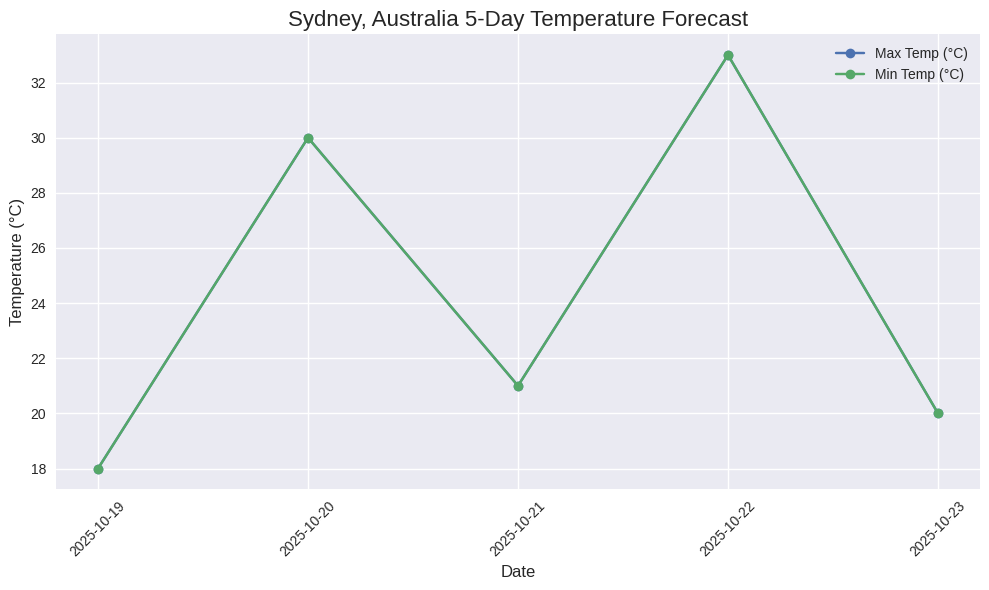

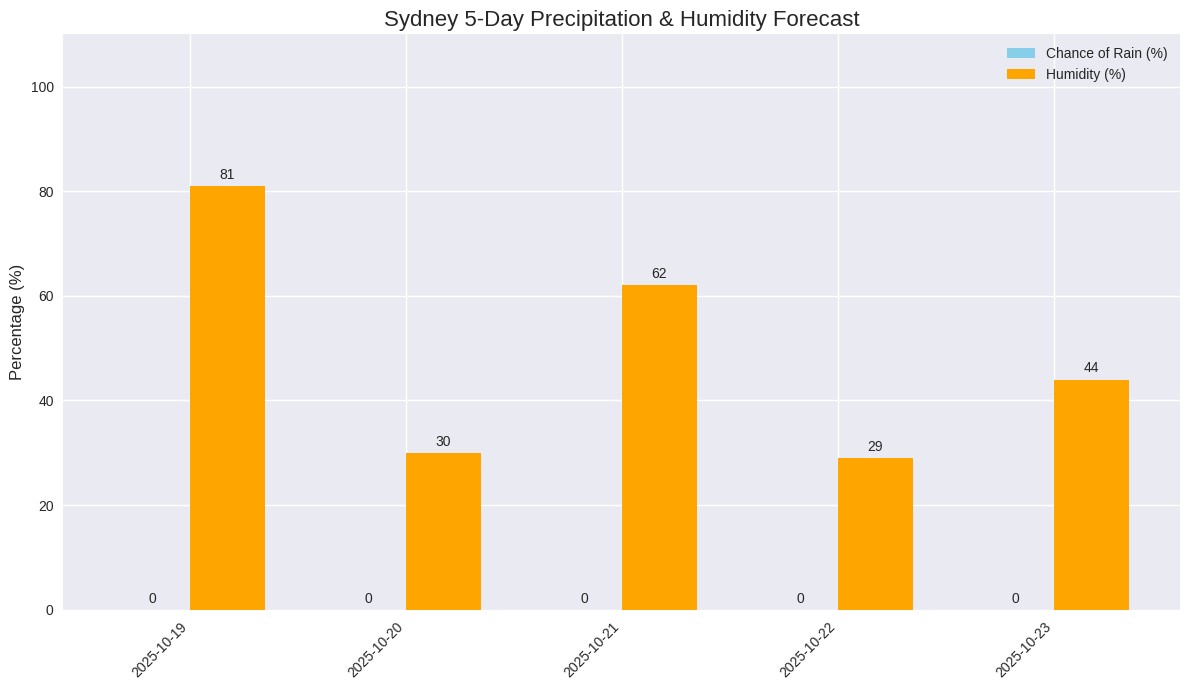


Press Enter to return to the main menu...
               WEATHER WIZARD DASHBOARD

Welcome! Choose an option below to get started.
Please select an option:
1. Get Weather Forecast & Visualisations
2. Ask the Weather Advisor (Chat)
3. Exit
1
Please enter a location (e.g., 'Perth, AU'):
> mustafar

Fetching weather data for mustafar...
Sorry, I couldn't find any weather data for 'mustafar'. Please check the spelling and try again (e.g., 'City, CountryCode').
Returning to the main menu.
               WEATHER WIZARD DASHBOARD

Welcome! Choose an option below to get started.
Please select an option:
1. Get Weather Forecast & Visualisations
2. Ask the Weather Advisor (Chat)
3. Exit
2
Welcome to the Weather Wizard! Ask me a weather question (e.g., 'what is the temp in Sydney tomorrow?'). You can now ask about specific days within the 5-day forecast (e.g., 'weather in Paris in 3 days').
You can also ask for advice (e.g., 'should I wear a jacket in London?').
Type 'exit' to quit.

> what is t

In [98]:
    run_weather_dashboard()